## 1) List TEN things you learned during Week 5 and FIVE things you still don't understand or are curious and would like to learn about.

- ### *Things I have learned* 

1. The logic and reasons behind factorizing different objects into the smaller componants 
2. One of the important matrix factorization is the singular value decomposition that has so many applications in data analysis and visualizations
3. Visualizing matrices as images in python 
4. Finding the singular value decomposition of a square matrix in python 
5. Splitting the figure of the visualization of SVD into 
6. Applying the singular value decomposition to images
7. Reading the image file by  plt.imread which via this function the image can be saved as 3 dimensional array, one layer for each channel.
8. Saving each channel in its own two dimensional matrix in python
9. Reading the actual red, green and blue tints for each channel by layering each of them with two zero layers.
10. How to redefine Sigma with the reduced number of singular values

- ### *Things that I am still struggling with*
1. I like to know how can we actually change the size of images? is it even possible?
2. Does it have to be a specific quality once we upload the pictures? or it actually can read anything?
3. Is using SVD the most common way for visualizing pictures or images? or there is actually some easier ways to do it?
4. When I opened my picture in the computer the dimension of it was different than when i actually uploaded it here is this something that python does it itself?
5. What are the pixels depend on? the dimension of the image or the size?

# 2. Explain your own understanding of the Singular Value Decomposition and list four applications where it plays a crucial role. You can google parts of your answer to this question however I want to read your own understanding and your voice. Note that I am not asking you to explain how to compute the singular value decomposition.

Singular value decomposition is basically the most important topic and also the most useful topic in linear algebra. In SVD we can decompose any $m$ X $n$ matrix with any shape whether it is rectangular or square into three matrices; the first one is the square matrix the second one has the exact same shape with the original matrix and the third one is also a square matrix. We do it in order to understand that matrix structure better and it also makes working with matrices way easier.
We use SVD in different fields such as:
[test](https://medium.com/appengine-ai/singular-value-decomposition-and-its-application-in-ai-120397aa2047#:~:text=Application%20of%20Singular%20Value%20Decomposition%2C&text=Its%20application%20in%20image%20processing,with%20non%2Dscaled%20mode%20shapes.)
1. It uses in Numerical weather prediction is helpful where mathematical modes of the atmosphere are used weather prediction based on present weather condition.
2. In signal processing, singular value decomposition and pseudoinverse have been efficiently applicable in analyzing modifying, and synthesizing signals and sounds.
3. Its contribution in the field of quantum information where it is referred to as Schmidt decomposition cannot be ignored.
4. It is quite helpful in face recognition, widely known as model analysis, where non-scaled mode shapes can be determined with non-scaled mode shapes. 
5. And of course in image processing as we did in this week.

# 3. Using the singular value decomposition to compress an image:
1. Upload the image you want to work on.
2. Split the image into its three channels.
3. For each channel: 
 - a. Find and imshow its Singular Value Decomposition. 
 - b. Choose only the first 20 singular values and find the new reduced rank channel. (Here you have to only keep the first twenty columns of U and the first twenty rows of Vt, see my Jupyter Notebook).
 - c. Combine the three reduced rank channels back into a compressed image and imshow the image.
 - d. Compute the size of the image you started with (total number of pixels) and the size of the one you ended up with. 


Text(0.5, 1.0, 'Vt')

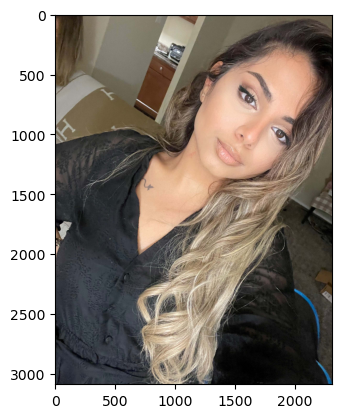

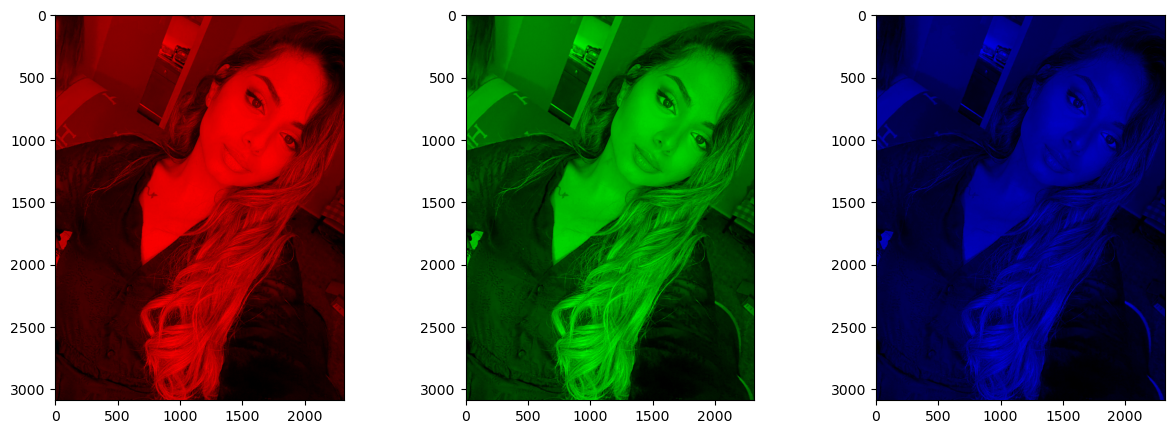

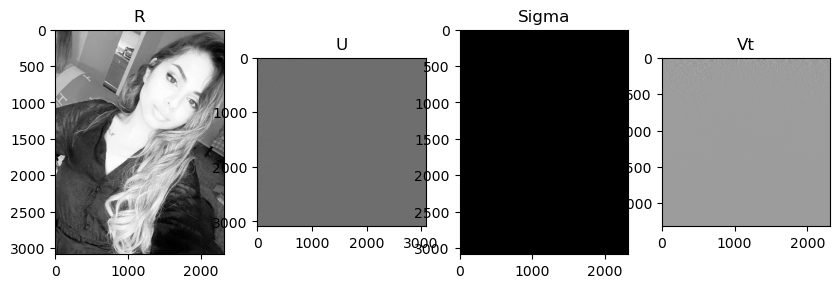

In [31]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


#1. Uploading and displaying the image i want to work on 

picture = plt.imread("IMG_2517.JPG")
plt.imshow(picture)

#2. splitting into three channels
# Let's save each channel in its own two dimensional matrix
R=picture[:,:,0] # red channel
G=picture[:,:,1] # green channel
B=picture[:,:,2] # blue channel
# Let's display these three channels. I will plot first two on grey scale and the third on color scale
# Define new zero channel
z=np.zeros(np.shape(R))
# scale all the pixels to numbers between 0 and 1 (instead of between 0 and 255, unless you are sure those were all integers)
R1=R/255
G1=G/255
B1=B/255
# red channel stays, others zero
red_tint=np.dstack((R1,z,z))
# green channel stays, others zero
green_tint=np.dstack((z,G1,z))
# blue channel stays, others zero
blue_tint=np.dstack((z,z,B1))
# split the figure into 3 subplots
fig, subs=plt.subplots(nrows = 1, ncols=3, figsize=(15,5))
subs[0].imshow(red_tint)
subs[1].imshow(green_tint)
subs[2].imshow(blue_tint)

# a Find the singular value decomposition 
U,sigma,Vt=np.linalg.svd(R1)
Sigma=np.zeros(R1.shape) 
m=np.amin(R1.shape) 
Sigma[0:m,0:m]=np.diag(sigma)
fig, subs=plt.subplots(nrows = 1, ncols=4, figsize=(10,5))
subs[0].imshow(R,cmap=cm.Greys_r)
subs[0].set_title('R')
subs[1].imshow(U,cmap=cm.Greys_r)
subs[1].set_title('U')
subs[2].imshow(Sigma,cmap=cm.Greys_r)
subs[2].set_title('Sigma')
subs[3].imshow(Vt,cmap=cm.Greys_r)
subs[3].set_title('Vt')



The original number of nonzero singular values is 2316


Text(0.5, 1.0, 'Keep only 20 singular values in the red channel')

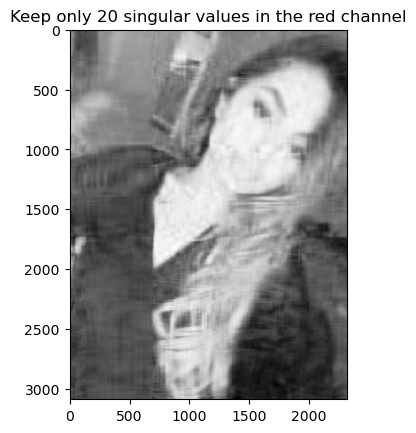

In [32]:
#b

# Let's show only the first 20 diagonal entries of Sigma
plt.imshow(Sigma[0:20,0:20],cmap=cm.Greys_r)
print(f"The original number of nonzero singular values is {len(sigma)}")

r=20
new_Sigma=Sigma[0:r,0:r]
new_U=U[:,0:r]
new_Vt=Vt[0:r,:]
product_r=new_U.dot(new_Sigma.dot(new_Vt))
plt.imshow(product_r,cmap=cm.Greys_r)
plt.title(f"Keep only {r} singular values in the red channel")



Text(0.5, 1.0, 'Keep only 20 singular values in the green channel')

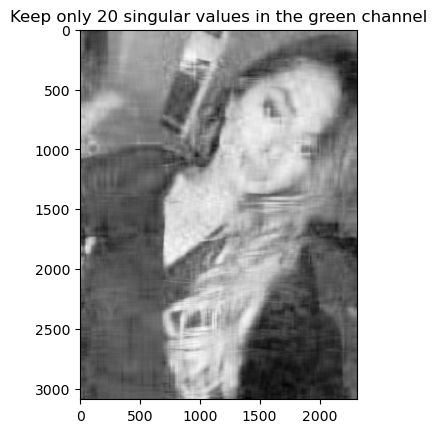

In [26]:
#b for green 

U,sigma,Vt=np.linalg.svd(G)
new_sigma=sigma[0:r]
new_Sigma=np.diag(new_sigma)
new_U=U[:,0:r]
new_Vt=Vt[0:r,:]
product_g=new_U.dot(new_Sigma.dot(new_Vt))
plt.imshow(product_g,cmap=cm.Greys_r)
plt.title(f"Keep only {r} singular values in the green channel")

Text(0.5, 1.0, 'Keep only 20 singular values in the blue channel')

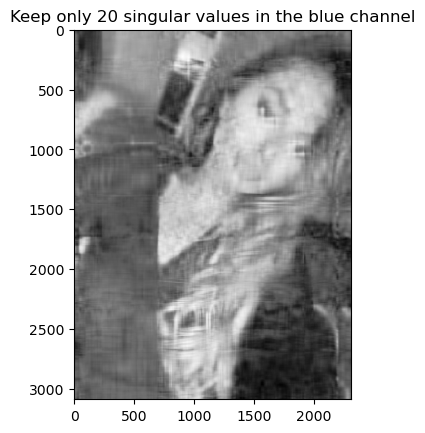

In [28]:
#b for blue

U,sigma,Vt=np.linalg.svd(B)
new_sigma=sigma[0:r]
new_Sigma=np.diag(new_sigma)
new_U=U[:,0:r]
new_Vt=Vt[0:r,:]
product_b=new_U.dot(new_Sigma.dot(new_Vt))
plt.imshow(product_b,cmap=cm.Greys_r)
plt.title(f"Keep only {r} singular values in the blue channel")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The original image had 21455424 pixels
The reduced rank image has 21455424 pixels but it requires much less storage.


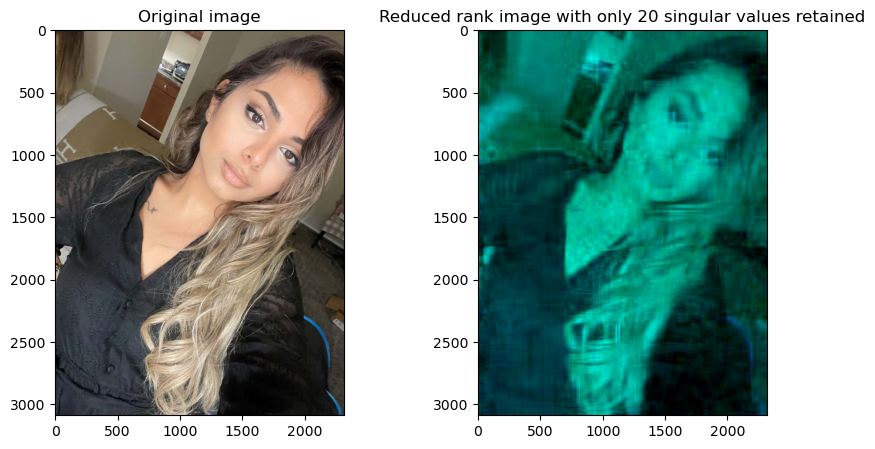

In [30]:
#c and #d

product_r_1=product_r.astype(int)
product_g_1=product_g.astype(int)
product_b_1=product_b.astype(int)
reduced_rank_image=np.dstack((product_r_1,product_g_1,product_b_1))

fig,subs=plt.subplots(nrows=1, ncols=2, figsize=(10,5))
subs[0].imshow(picture)
subs[0].set_title('Original image')
subs[1].imshow(reduced_rank_image)
subs[1].set_title(f'Reduced rank image with only {r} singular values retained')

print(f'The original image had {picture.size} pixels')
print(f'The reduced rank image has {reduced_rank_image.size} pixels but it requires much less storage.')